## Installing Libraries

In [2]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 15.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Copy the dataset to the working directory

In [3]:
!cp -r /kaggle/input/mars-rocks-detection-yolov11 /kaggle/working

## Split the dataset into train and validation

In [4]:
import os
import shutil
import random

train_images_path = '/kaggle/working/mars-rocks-detection-yolov11/train/images'
train_labels_path = '/kaggle/working/mars-rocks-detection-yolov11/train/labels'

val_images_path = '/kaggle/working/mars-rocks-detection-yolov11/valid/images'
val_labels_path = '/kaggle/working/mars-rocks-detection-yolov11/valid/labels'
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

image_files = [f for f in os.listdir(train_images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(image_files)

split_index = int(len(image_files) * 0.7)  
train_files = image_files[:split_index]
val_files = image_files[split_index:]

def move_files(files, source_folder, dest_folder):
    for file in files:
        shutil.move(os.path.join(source_folder, file), os.path.join(dest_folder, file))
        label_file = file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
        shutil.move(os.path.join(train_labels_path, label_file), os.path.join(val_labels_path, label_file))

move_files(val_files, train_images_path, val_images_path)

print(f"Training images: {len(train_files)}")
print(f"Validation images: {len(val_files)}")

Training images: 193
Validation images: 83


## Disable wandb

In [5]:
import wandb
wandb.init(mode="disabled")

## Import libraries

In [22]:
from random import sample
from ultralytics import YOLO
from IPython.display import display, Image, FileLink

## Training YOLOv11

### Set paths

In [7]:
%%writefile /kaggle/working/mars-rocks-detection-yolov11/data.yaml
train: /kaggle/working/mars-rocks-detection-yolov11/train/images
val: /kaggle/working/mars-rocks-detection-yolov11/valid/images

nc: 1  
names: ['mars-rocks']  

roboflow:
  workspace: ritesh-laf7m
  project: mars-rocks-detection
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/ritesh-laf7m/mars-rocks-detection/dataset/4


Overwriting /kaggle/working/mars-rocks-detection-yolov11/data.yaml


## Configurations

In [8]:
data_yaml_path = '/kaggle/working/mars-rocks-detection-yolov11/data.yaml'
model_path = '/kaggle/working/runs/detect/train/weights/best.pt'  
epochs = 20

In [9]:
model = YOLO('yolo11s.pt')

100%|██████████| 18.4M/18.4M [00:00<00:00, 155MB/s]


### Start Training

In [10]:
train_results = model.train(
    data = data_yaml_path,
    epochs = epochs 
)

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/mars-rocks-detection-yolov11/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]
2024-11-28 23:55:02,220	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-28 23:55:02,794	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/mars-rocks-detection-yolov11/train/labels... 193 images, 0 backgrounds, 0 corrupt: 100%|██████████| 193/193 [00:00<00:00, 804.76it/s]

train: WARNING ⚠️ /kaggle/working/mars-rocks-detection-yolov11/train/images/rock_571_jpg.rf.3dfcccbe9ca8897544396ad1d410a229.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/mars-rocks-detection-yolov11/train/images/rock_571_jpg.rf.95e21176b1a9111693e206230825b718.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/mars-rocks-detection-yolov11/train/images/rock_571_jpg.rf.9df4436733d67077b29dda95ddcf767d.jpg: 1 duplicate labels removed
train: New cache created: /kaggle/working/mars-rocks-detection-yolov11/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/mars-rocks-detection-yolov11/valid/labels... 83 images, 0 backgrounds, 0 corrupt: 100%|██████████| 83/83 [00:00<00:00, 765.48it/s]

val: New cache created: /kaggle/working/mars-rocks-detection-yolov11/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.65G      1.562      3.858       1.58          3        640: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         83        462      0.459      0.338      0.321      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.76G      1.462      2.173      1.338          5        640: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         83        462      0.443       0.34      0.332      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.59G      1.385      1.819      1.277          3        640: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         83        462      0.417       0.44      0.377      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.84G      1.542      1.667       1.33          5        640: 100%|██████████| 13/13 [00:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         83        462      0.393      0.374      0.332      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.76G       1.42       1.58      1.305         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


                   all         83        462      0.315      0.554      0.379      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.64G      1.514      1.601      1.376          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]


                   all         83        462      0.338      0.571      0.436      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.95G      1.542      1.621      1.333          4        640: 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]


                   all         83        462      0.403       0.45      0.378       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.63G      1.404      1.425      1.293          5        640: 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]


                   all         83        462      0.338       0.39      0.281      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.84G      1.395      1.408      1.257          4        640: 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]


                   all         83        462      0.497       0.47      0.466      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       4.6G      1.421      1.454      1.291          1        640: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         83        462      0.487      0.517      0.451      0.246


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.81G      1.313       1.26      1.231          8        640: 100%|██████████| 13/13 [00:04<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]


                   all         83        462      0.515      0.589      0.561      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.66G      1.327        1.2      1.262          4        640: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]


                   all         83        462      0.496       0.37       0.39      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.84G      1.334      1.246      1.225         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         83        462      0.588      0.578      0.595      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.77G      1.332      1.307      1.269          1        640: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         83        462      0.549      0.561      0.586      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.98G      1.264      1.319       1.21          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         83        462      0.573      0.647      0.639      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.81G       1.22      1.049      1.166          8        640: 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]


                   all         83        462      0.671      0.615      0.681      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.84G      1.294      1.024      1.264          1        640: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         83        462      0.612      0.643      0.677      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.56G      1.155      1.005       1.15          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         83        462      0.619       0.64      0.671      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.61G      1.205     0.9959      1.161          3        640: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         83        462      0.651      0.621      0.686      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.88G      1.119     0.9196      1.143          1        640: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         83        462      0.716      0.606      0.705      0.435



20 epochs completed in 0.037 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


                   all         83        462      0.706      0.617      0.705      0.435
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


## Zipping the trained model for later use

In [11]:
!zip yolov11-rocks.zip $model_path

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/runs/detect/train/weights/best.pt (deflated 8%)


## Downloading the saved model

In [23]:
FileLink('yolov11-rocks.zip')

/kaggle/working/yolov11-rocks.zip

## Running Predictions

In [19]:
!yolo task=detect \
mode=predict \
model=$model_path \
source=$val_images_path
conf=0.5

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/83 /kaggle/working/mars-rocks-detection-yolov11/valid/images/rock_503_jpg.rf.9c3349bd8026fd2dabf083155e9aa8d8.jpg: 640x640 12 mars-rockss, 12.0ms
image 2/83 /kaggle/working/mars-rocks-detection-yolov11/valid/images/rock_504_jpg.rf.c085ec46b7544c470bee6796f561fd28.jpg: 640x640 2 mars-rockss, 9.2ms
image 3/83 /kaggle/working/mars-rocks-detection-yolov11/valid/images/rock_505_jpg.rf.4e98be3e1c88812a3bf1dd09a2671d17.jpg: 640x640 3 mars-rockss, 9.7ms
image 4/83 /kaggle/working/mars-rocks-detection-yolov11/valid/images/rock_505_jpg.rf.a64a349d532d149740d88aa38a5162c6.jpg: 640x640 3 mars-rockss, 9.1ms
image 5/83 /kaggle/working/mars-rocks-detection-yolov11/valid/images/rock_505_jpg.rf.b0d3b2010cad95459c2e38801600d4a4.jpg: 640x640 3 mars-rockss, 9.2ms
image 6/83 /kaggle/working/mars-rocks-detection-yolov11/valid/ima

## Visualizing the Results

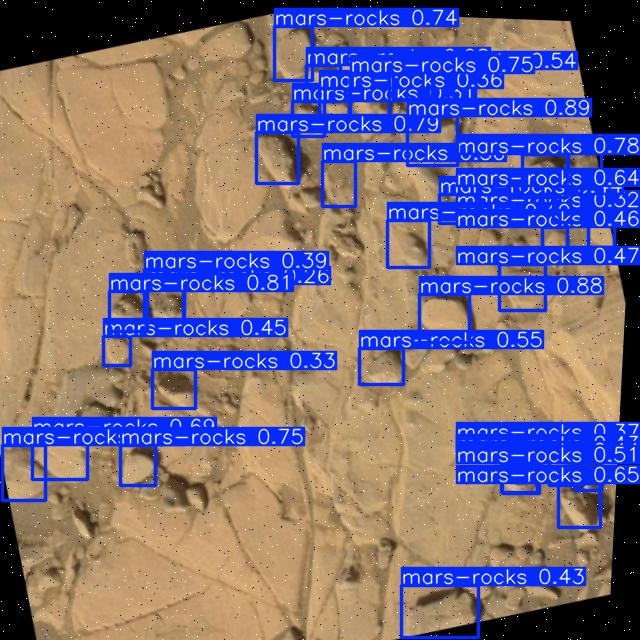

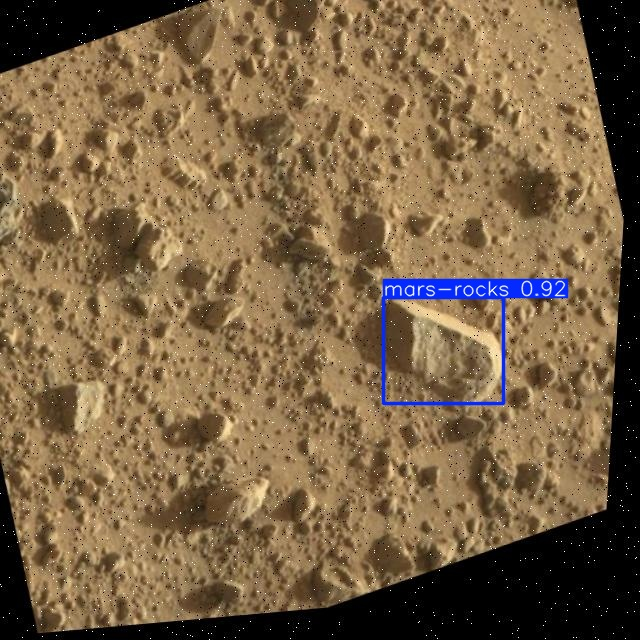

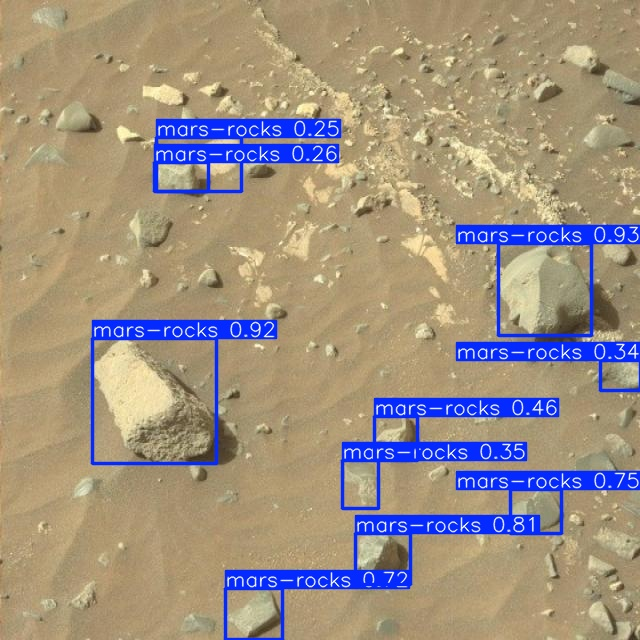

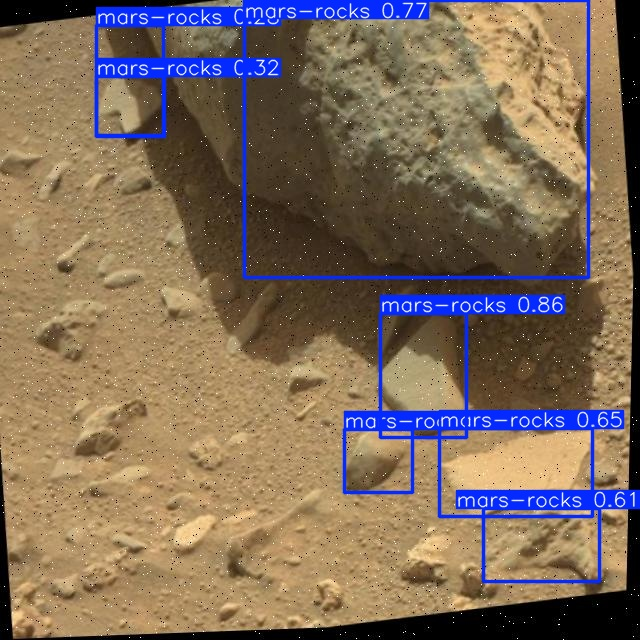

In [21]:
for image in sample(os.listdir('/kaggle/working/runs/detect/predict'), 4):
    if image.lower().endswith('.png') or image.lower().endswith('.jpg'):
        display(Image(filename = '/kaggle/working/runs/detect/predict/' + image, height = 800, width = 800))